In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats     #To draw the QQ plot    
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV




In [3]:
df = sns.load_dataset('titanic')

In [4]:
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

### Dropping Unnecessary columns

In [5]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [6]:
df.drop(columns=[ 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone','class'],inplace=True)

In [7]:
df.head(2)

survived  pclass     sex   age  sibsp  parch     fare embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C

# EDA

In [8]:
df.shape


(891, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [10]:
df.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [11]:
print(df.isnull().sum())
print("--"*40)
print((df.isnull().sum()/df.shape[0])*100)

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64
--------------------------------------------------------------------------------
survived     0.000000
pclass       0.000000
sex          0.000000
age         19.865320
sibsp        0.000000
parch        0.000000
fare         0.000000
embarked     0.224467
dtype: float64


### age columns consists of 177 Null values (i.e 19.5 %) and embarked column consist of 2 Null values (i.e 0.22 %)

# Imputing the age and embarked column

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


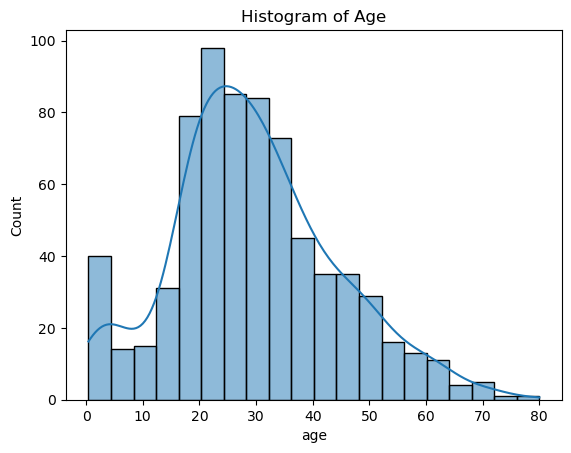

In [12]:
sns.histplot(data=df,x='age',kde=True)
plt.title('Histogram of Age')
plt.show()

In [13]:
#Seperating Input features and Target variable
x=df.iloc[:,1:]
y=df.iloc[:,0:1]

# x consist of following columns: 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class'
# y consist of following column: 'survived'

In [14]:
x

pclass     sex   age  sibsp  parch     fare embarked
0         3    male  22.0      1      0   7.2500        S
1         1  female  38.0      1      0  71.2833        C
2         3  female  26.0      0      0   7.9250        S
3         1  female  35.0      1      0  53.1000        S
4         3    male  35.0      0      0   8.0500        S
..      ...     ...   ...    ...    ...      ...      ...
886       2    male  27.0      0      0  13.0000        S
887       1  female  19.0      0      0  30.0000        S
888       3  female   NaN      1      2  23.4500        S
889       1    male  26.0      0      0  30.0000        C
890       3    male  32.0      0      0   7.7500        Q

[891 rows x 7 columns]

In [15]:
# x['pclass'].unique()

In [16]:
y

survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]

# Train-test split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

## Column transformation to impute age and embarked column

In [18]:
# Custom function to apply backward fill in Embarked column
def bfill_embarked(X):
    X = pd.DataFrame(X)  # Convert to DataFrame to use pandas' bfill method
    return X.fillna(method='bfill').values  # Apply backward fill and return as numpy array


In [19]:
#Column transformer for Imputing Age with mean and embarked with backward fill
impute_age_embarked = ColumnTransformer(transformers=[
     # ('embarked_encoder', OneHotEncoder(sparse=False,drop='first'), ['embarked']),
    ('age_imputer', SimpleImputer(missing_values=np.nan, strategy='mean'), ['age']),
    ('embarked_bfill', FunctionTransformer(bfill_embarked, validate=False), ['embarked'])
], remainder='passthrough')

## AFter applying impute_age_embarked column transformer the order of column will be:
### 0.age    1.embarked 2.pclass    3.sex    4.sibsp    5.parch    6.fare 

# ------------------------------------------------------------------------------------------
## Column transformation to handle categorical column:
## embarked,sex,sibsp -> Nominal Encoding(One hot encoding)


In [20]:
encoding_ct = ColumnTransformer(transformers=[
     ('Ohe_encoder', OneHotEncoder(sparse=False,drop='first'), [1,3]),
], remainder='passthrough')

# After applying encoding_ct column Transformer the order of the column is:
## 0.emb_q   1.emb_s  2.sex_m 3.age 4.pclass 5.sibsp 6.prach 7.fare

# ---------------------------------------------------------------
## Column transformation to apply Standard scaler to Age column and Minmax sclaer to fare column


In [21]:
scaler_ct = ColumnTransformer([
    ('standardscaler_age',StandardScaler(),[3]),
    ('minmaxscaler_fare',MinMaxScaler(),[7])
], remainder='passthrough')

In [22]:
pipe = Pipeline([
    ('impute_age_embarked',impute_age_embarked),
    ('encoding_ct',encoding_ct),
    ('scaler_ct',scaler_ct)
])

In [23]:
pipe

Pipeline(steps=[('impute_age_embarked',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age_imputer',
                                                  SimpleImputer(), ['age']),
                                                 ('embarked_bfill',
                                                  FunctionTransformer(func=<function bfill_embarked at 0x0000013C4FE5A160>),
                                                  ['embarked'])])),
                ('encoding_ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ohe_encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [1, 3])])),
                ('scaler_ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler_age',
                                                  StandardScaler(), [3]),
                                                 ('minmaxscaler_fare',
                                                  MinMaxScaler(), [7])]))])

In [24]:
x_train_transformed=pipe.fit_transform(x_train)
x_test_transformed=pipe.transform(x_test)


C:\Users\Prabal Kuinkel\AppData\Local\Temp\ipykernel_6660\82601808.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return X.fillna(method='bfill').values  # Apply backward fill and return as numpy array
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Prabal Kuinkel\AppData\Local\Temp\ipykernel_6660\82601808.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return X.fillna(method='bfill').values  # Apply backward fill and return as numpy array


In [25]:
x_train

pclass     sex   age  sibsp  parch      fare embarked
331       1    male  45.5      0      0   28.5000        S
733       2    male  23.0      0      0   13.0000        S
382       3    male  32.0      0      0    7.9250        S
704       3    male  26.0      1      0    7.8542        S
813       3  female   6.0      4      2   31.2750        S
..      ...     ...   ...    ...    ...       ...      ...
106       3  female  21.0      0      0    7.6500        S
270       1    male   NaN      0      0   31.0000        S
860       3    male  41.0      2      0   14.1083        S
435       1  female  14.0      1      2  120.0000        S
102       1    male  21.0      0      1   77.2875        S

[712 rows x 7 columns]

In [26]:
x_train_transformed = pd.DataFrame(x_train_transformed,columns=['age','fare','embarked_q','embarked_s','sex_m','pclass','sibsp','parch'])
x_test_transformed = pd.DataFrame(x_test_transformed,columns=['age','fare','embarked_q','embarked_s','sex_m','pclass','sibsp','parch'])


# Convert all columns to numeric
x_train_transformed = x_train_transformed.apply(pd.to_numeric, errors='coerce')
x_train_transformed.head()

# After applying encoding_ct column Transformer the order of the column is:
## 0.emb_q   1.emb_s  2.sex_m 3.age 4.pclass 5.sibsp 6.prach 7.fare


age      fare  embarked_q  embarked_s  sex_m  pclass  sibsp  parch
0  1.232263  0.055628         0.0         1.0    1.0       1      0      0
1 -0.500482  0.025374         0.0         1.0    1.0       2      0      0
2  0.192616  0.015469         0.0         1.0    1.0       3      0      0
3 -0.269449  0.015330         0.0         1.0    1.0       3      1      0
4 -1.809667  0.061045         0.0         1.0    0.0       3      4      2

In [27]:
type(x_train_transformed)

pandas.core.frame.DataFrame

In [28]:
x_test_transformed

age      fare embarked_q embarked_s sex_m pclass sibsp parch
0         0.0  0.029758        0.0        0.0   1.0      3     1     1
1    0.115605  0.020495        0.0        1.0   1.0      2     0     0
2   -0.731515  0.015469        0.0        1.0   1.0      3     0     0
3   -1.809667  0.064412        0.0        1.0   0.0      2     0     1
4    -1.19358  0.021942        0.0        0.0   0.0      3     1     0
..        ...       ...        ...        ...   ...    ...   ...   ...
174 -0.962547  0.013907        0.0        1.0   1.0      3     0     0
175       0.0  0.014102        0.0        0.0   1.0      3     0     0
176  0.654681  0.061264        0.0        1.0   0.0      3     1     5
177 -0.962547  0.020495        0.0        1.0   0.0      2     0     0
178 -1.963689  0.032596        0.0        1.0   0.0      3     1     1

[179 rows x 8 columns]

# Distribution of the columns using histplot and QQ plot

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


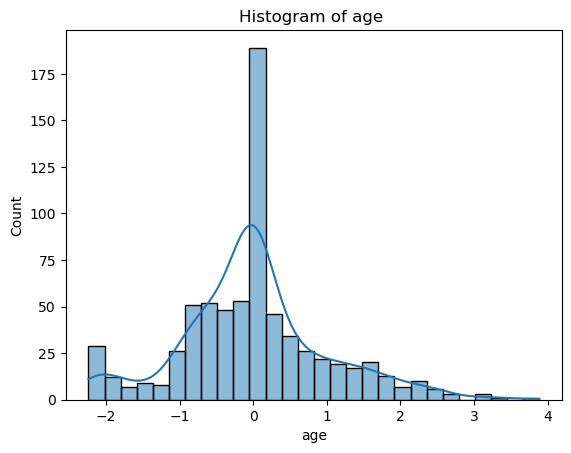

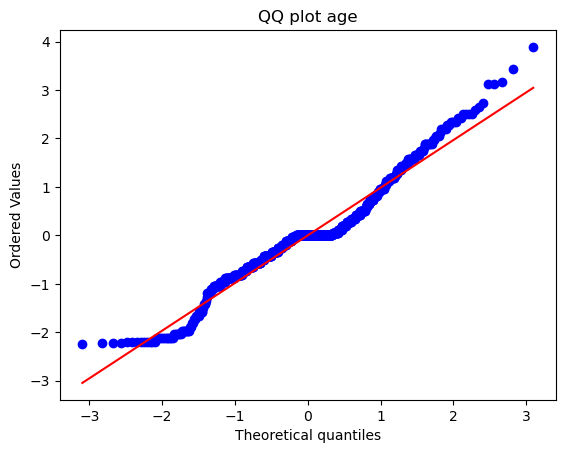

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


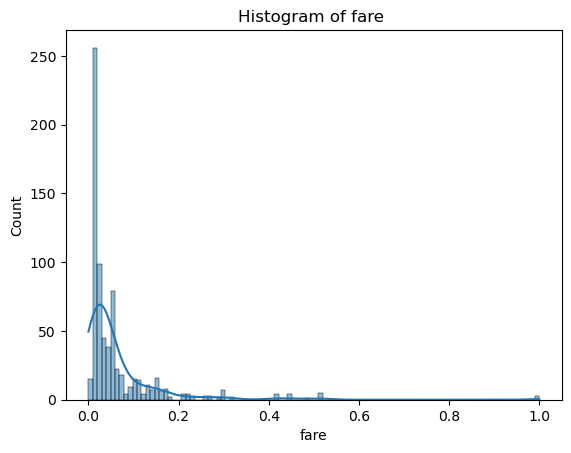

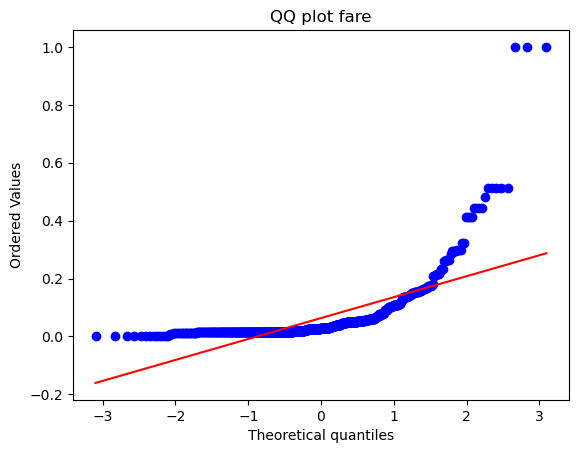

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


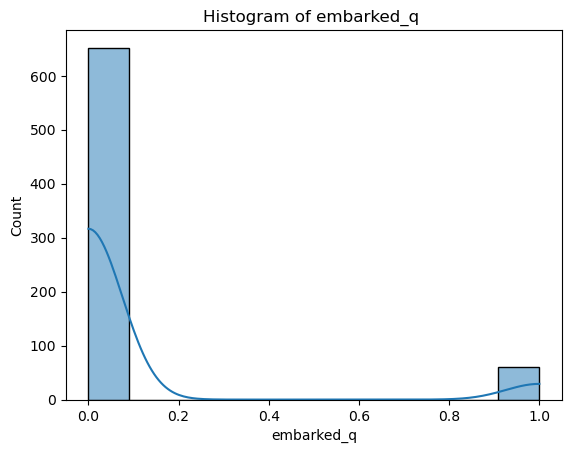

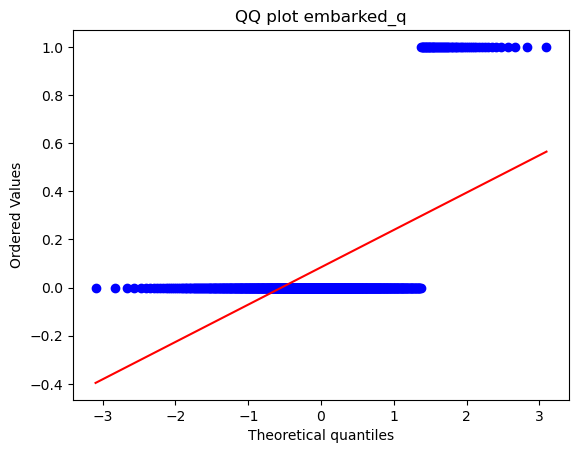

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


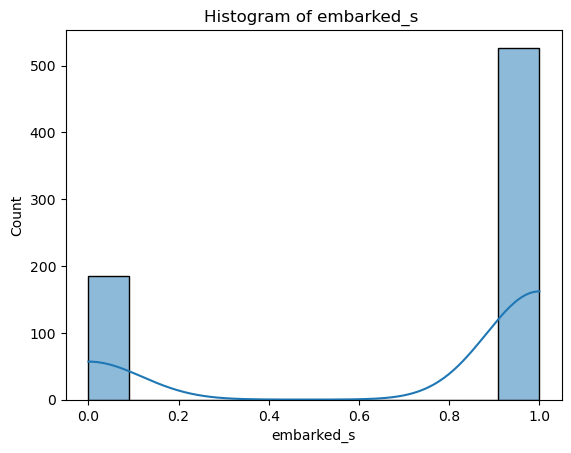

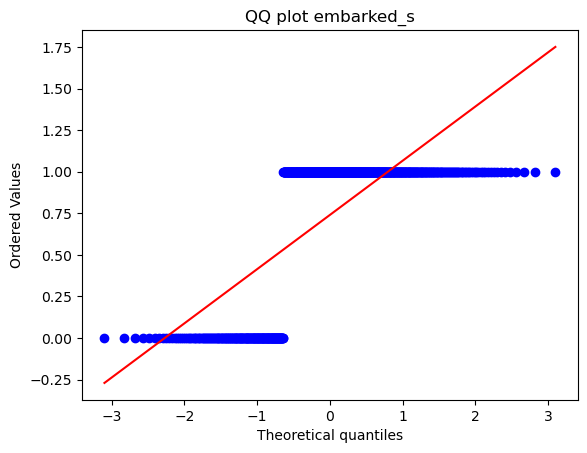

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


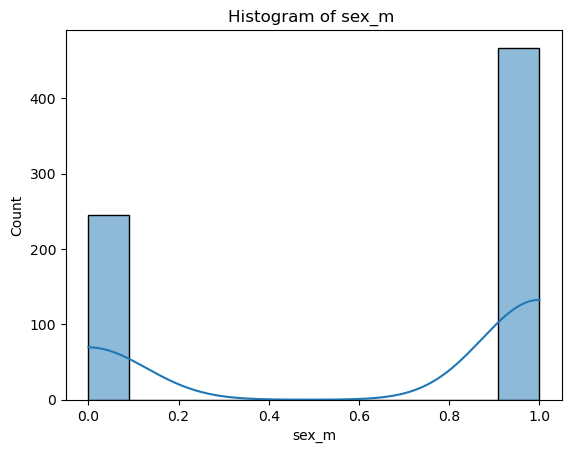

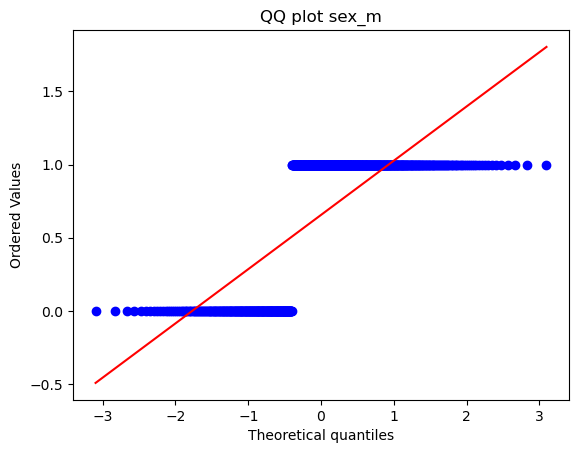

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


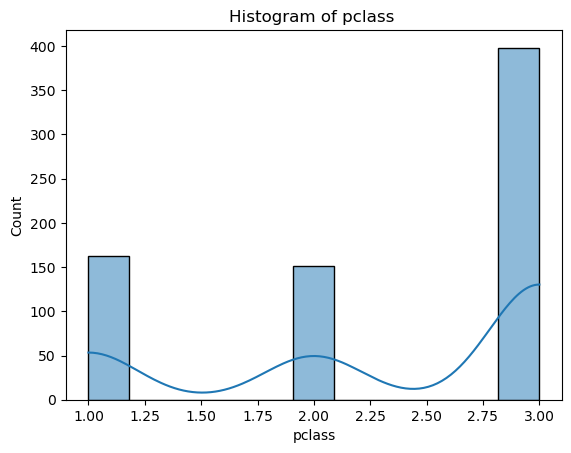

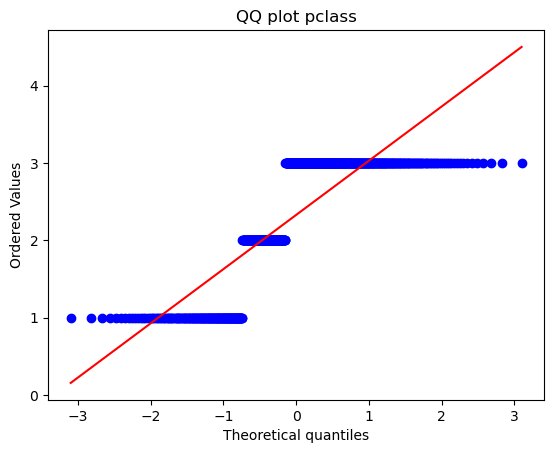

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


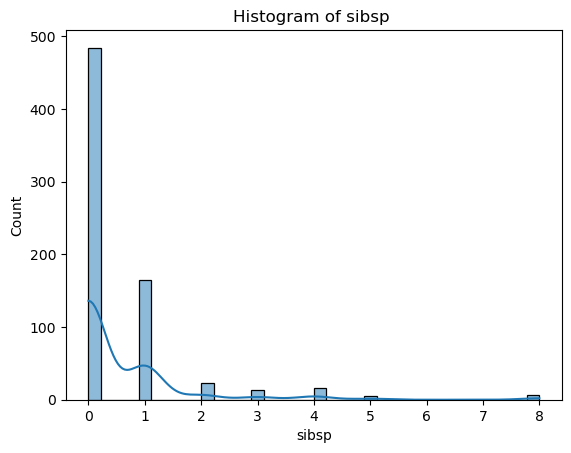

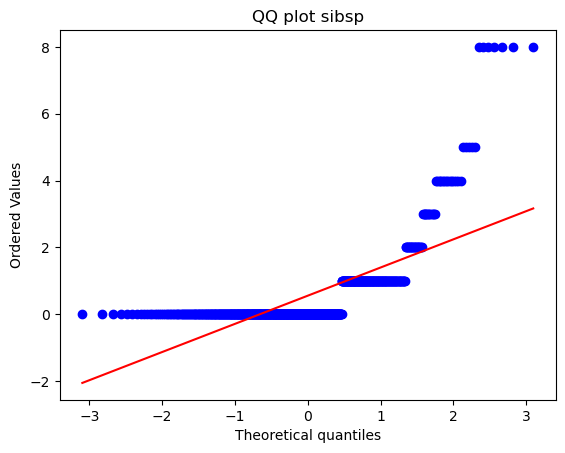

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


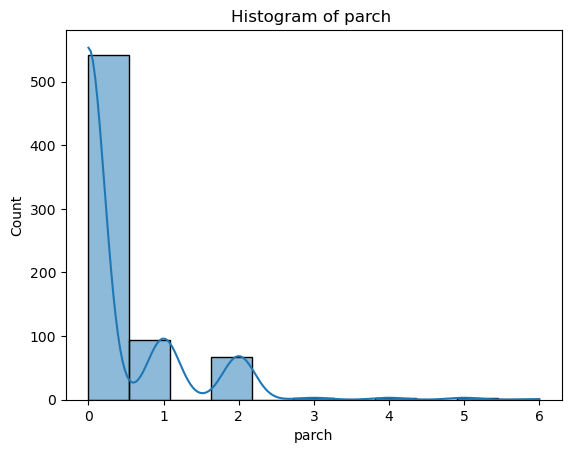

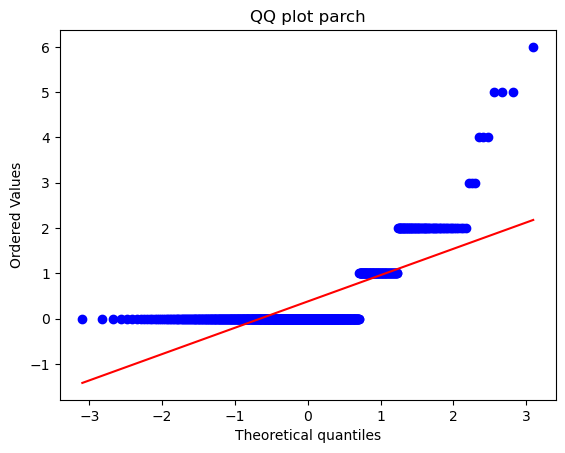

In [29]:
for col in x_train_transformed.columns:
    sns.histplot(data=x_train_transformed,x=col,kde=True)
    plt.title(f'Histogram of {col} ')
    plt.show()

    stats.probplot(x_train_transformed[col],dist='norm',plot=plt)
    plt.title(f'QQ plot {col}')
    plt.show()

    

# 2 seperate pipeline for training the model with logistic regression and decision tree

In [30]:
logistic_model = LogisticRegression()
decision_model = DecisionTreeClassifier()

In [31]:
pipe_logisticmodel = Pipeline([
    ('logistic_model',logistic_model)
])

In [32]:
pipe_decisionmodel = Pipeline([
    ('decision_model',decision_model)
])

In [33]:
# Combine the two pipelines
logistic_pipe = Pipeline([
    ('preprocessing', pipe),      # First pipeline (preprocessing steps)
    ('model', pipe_logisticmodel)              # Second pipeline (logistic regression model)
])

In [34]:
# Combine the two pipelines
decision_pipe = Pipeline([
    ('preprocessing', pipe),      # First pipeline (preprocessing steps)
    ('model', pipe_decisionmodel)              # Second pipeline (logistic regression model)
])

# Making Prediction and checking accuracy

In [35]:
# combined_pipe.fit(x_train,y_train)
# y_predict_combined=combined_pipe.predict(x_test)

logistic_pipe.fit(x_train,y_train)
decision_pipe.fit(x_train,y_train)

y_predict_logistic = logistic_pipe.predict(x_test)
y_predict_decision = decision_pipe.predict(x_test)


C:\Users\Prabal Kuinkel\AppData\Local\Temp\ipykernel_6660\82601808.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return X.fillna(method='bfill').values  # Apply backward fill and return as numpy array
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Prabal Kuinkel\AppData\Local\Temp\ipykernel_6660\82601808.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future ve

In [36]:
print("Accuracy of Logistic Regression: ",accuracy_score(y_test,y_predict_logistic))
print("Accuracy of Decision Tree: ",accuracy_score(y_test,y_predict_decision))

Accuracy of Logistic Regression:  0.8044692737430168
Accuracy of Decision Tree:  0.7877094972067039


## Cross validation score

In [37]:
crossval_logistic = cross_val_score(logistic_pipe, x_train, y_train, cv=10).mean()
crossval_decision= cross_val_score(decision_pipe, x_train, y_train, cv=10).mean()
print('cross validation score of Logistic Regression :',crossval_logistic)
print('cross validation score of Decision Tree :',crossval_decision)

C:\Users\Prabal Kuinkel\AppData\Local\Temp\ipykernel_6660\82601808.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return X.fillna(method='bfill').values  # Apply backward fill and return as numpy array
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Prabal Kuinkel\AppData\Local\Temp\ipykernel_6660\82601808.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future ve

cross validation score of Logistic Regression : 0.7948748043818467
cross validation score of Decision Tree : 0.7542840375586854


C:\Users\Prabal Kuinkel\AppData\Local\Temp\ipykernel_6660\82601808.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return X.fillna(method='bfill').values  # Apply backward fill and return as numpy array
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Prabal Kuinkel\AppData\Local\Temp\ipykernel_6660\82601808.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return X.fillna(method='bfill').values  # Apply backward fill and return as numpy array
C:\Users\Prabal Kuinkel\AppData\Local\Temp\ipykernel_6660\82601808.py:4: FutureWarning: DataFrame.fillna with 'method' is depreca

# Grid Search CV for hyper paramater tunning of logistic Regression

In [38]:
logistic_pipe.named_steps

{'preprocessing': Pipeline(steps=[('impute_age_embarked',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('age_imputer',
                                                   SimpleImputer(), ['age']),
                                                  ('embarked_bfill',
                                                   FunctionTransformer(func=<function bfill_embarked at 0x0000013C4FE5A160>),
                                                   ['embarked'])])),
                 ('encoding_ct',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('Ohe_encoder',
                                                   OneHotEncoder(drop='first',
                                                                 sparse=False),
                                                   [1, 3])])),
                 ('scaler_ct',
                  ColumnTransformer(remainder='passthrough',

In [39]:
# params=[{       
#    'model__penalty':['l1', 'l2', 'elasticnet', None],
#     'model__multi_class':['ovr', 'auto','multinomial'],
#     'model__C':np.logspace(2,2,10),
#     'model__max_iter':[100,1000,2500,5000]
# }
# ]

    # 'model__logistic_model__C': np.logspace(-4, 4, 10),  # A range of values for C

params = [{
    'model__logistic_model__penalty': ['l1', 'l2', 'elasticnet', None],
    'model__logistic_model__multi_class': ['ovr', 'multinomial','auto'],  # Removed 'auto'
    'model__logistic_model__C': np.logspace(-2, 2, 10),  # A range of values for C
    'model__logistic_model__max_iter': [100, 1000],  # Max iterations are fine
}]


# params = [{
#     'model__logistic_model__penalty': ['l1', 'l2', 'elasticnet', None],
#     'model__logistic_model__multi_class': ['ovr', 'multinomial', 'auto'],
#     'model__logistic_model__C': np.logspace(-2, 2, 10),
#     'model__logistic_model__max_iter': [100, 1000],
#     'model__logistic_model__l1_ratio': [0.0, 0.1, 0.5, 0.9, 1.0],  # For elasticnet
#     'model__logistic_model__solver': ['liblinear', 'saga'],  # Choose solvers based on your data size
#     'model__logistic_model__class_weight': [None, 'balanced'],  # For handling class imbalance
#     'model__logistic_model__fit_intercept': [True, False],  # Include or exclude intercept
# }]


In [40]:
# logistic_grid = GridSearchCV(logistic_pipe, params, cv=5,verbose=True)
# logistic_grid.fit(x_train, y_train)

In [41]:
# logistic_grid.best_score_

In [42]:
# logistic_grid.best_params_

# Grid search Cv for hyper paramater tunning of decision tree classifier

In [43]:
decision_pipe.steps

[('preprocessing',
  Pipeline(steps=[('impute_age_embarked',
                   ColumnTransformer(remainder='passthrough',
                                     transformers=[('age_imputer',
                                                    SimpleImputer(), ['age']),
                                                   ('embarked_bfill',
                                                    FunctionTransformer(func=<function bfill_embarked at 0x0000013C4FE5A160>),
                                                    ['embarked'])])),
                  ('encoding_ct',
                   ColumnTransformer(remainder='passthrough',
                                     transformers=[('Ohe_encoder',
                                                    OneHotEncoder(drop='first',
                                                                  sparse=False),
                                                    [1, 3])])),
                  ('scaler_ct',
                   ColumnTransformer(remaind

In [44]:
decision_params = [{
    'model__decision_model__criterion': ['gini', 'entropy'],
    'model__decision_model__max_depth': [None] + list(np.arange(1, 5)),  # None means nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples
    'model__decision_model__min_samples_split': np.arange(2, 5),
    'model__decision_model__min_samples_leaf': np.arange(1, 5),
    'model__decision_model__max_features': ['auto', 'sqrt', 'log2'],
    'model__decision_model__class_weight': [None, 'balanced'],
    'model__decision_model__max_leaf_nodes': np.arange(5, 10),
}]

In [ ]:
decision_grid = GridSearchCV(decision_pipe, decision_params, cv=5,verbose=True)
decision_grid.fit(x_train, y_train)

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits


C:\Users\Prabal Kuinkel\AppData\Local\Temp\ipykernel_6660\82601808.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return X.fillna(method='bfill').values  # Apply backward fill and return as numpy array
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Prabal Kuinkel\AppData\Local\Temp\ipykernel_6660\82601808.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffi